In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# MODEL ACQUISITION

In [ ]:
from transformers import Swin2SRForImageSuperResolution

model = Swin2SRForImageSuperResolution.from_pretrained("caidas/swin2SR-classical-sr-x2-64")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import requests
from PIL import Image

#url = "https://huggingface.co/spaces/jjourney1125/swin2sr/resolve/main/samples/butterfly.jpg"
image_file = '/content/drive/MyDrive/VDSR/Train/myButterfly.png'
#image = Image.open(requests.get(url, stream=True).raw)
image = Image.open(image_file)

# RESIZING AND DOWNSAMPLING OUR TEST IMAGE

In [ ]:
import cv2
import numpy as np
image = np.array(image)

h=256
w=256
c=3
new_height = int(h / 1.2)
new_width = int(w /1.2)
# Resize down the image
lr_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
lr_image = cv2.resize(lr_image, (w, h), interpolation=cv2.INTER_LINEAR)
print(lr_image.shape)

# Convert the tensor back to a numpy array and transpose dimensions
#input_image_np = input_image.squeeze().cpu().numpy().transpose((1, 2, 0))
# lr_image = lr_image.astype(np.float32)/255.0

(256, 256, 4)


In [ ]:
lr_image_rgb = cv2.cvtColor(lr_image, cv2.COLOR_RGBA2RGB)
print(lr_image_rgb.shape)

(256, 256, 3)


In [ ]:
from transformers import Swin2SRImageProcessor
processor = Swin2SRImageProcessor()

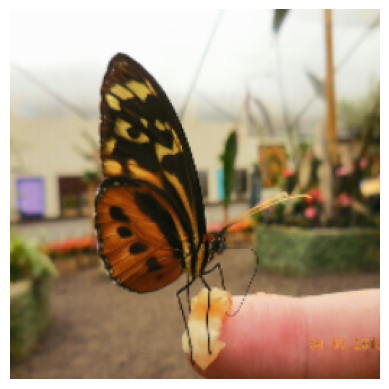

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(lr_image.shape)
pixel_values = processor(lr_image_rgb, return_tensors="pt").pixel_values
print(pixel_values.shape)

(256, 256, 4)
torch.Size([1, 3, 264, 264])


In [ ]:
import torch

with torch.no_grad():
  outputs = model(pixel_values)

# RESULTS

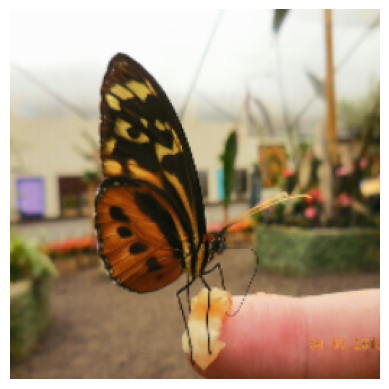

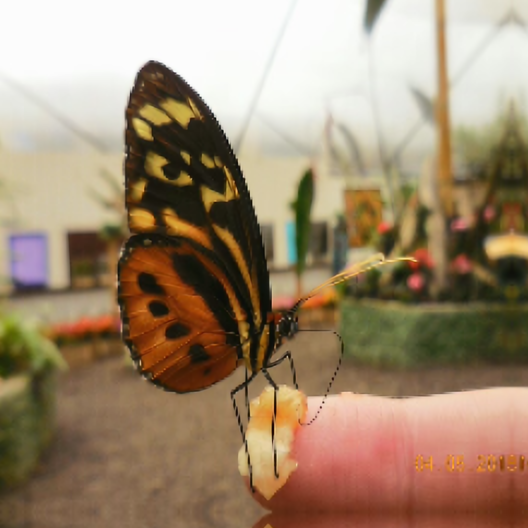

In [ ]:
import numpy as np

plt.imshow(lr_image_rgb)
plt.axis('off')  # This removes the axes around the image
plt.show()

output = outputs.reconstruction.data.squeeze().float().cpu().clamp_(0, 1).numpy()
output = np.moveaxis(output, source=0, destination=-1)
output = (output * 255.0).round().astype(np.uint8)  # float32 to uint8
Image.fromarray(output)